In [1]:
from apps.prod4a_merge_study import EventSelection
from python.analysis import Master, Plots
import awkward as ak
import numpy as np

events = Master.Data("work/ROOTFiles/Prod4a_6GeV_BeamSim_00.root", True)
EventSelection(events, invertFinal=True)


/home/sb16165/Documents/pi0-analysis/analysis/Master.py:50: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/Master.py:50: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/Master.py:50: UserWarning: Couldn't apply filters to _TrueParticleData__pi0_MC.
  warnings.warn(f"Couldn't apply filters to {var}.")


'BeamMCFilter' executed in 25.4256s
number of dalitz decays: 311
'ApplyBeamFilter' executed in 24.1190s
\begin{tabular}{lllll}
\hline
 event selection                       & type        & number of events & percentage of events removed & percentage of events remaining \\
 no selection                          & -           & 100222           & -                            &                                \\
 beam -\ensuremath{>} pi0 + X                       & truth       & 27341            & 72.71956257109217            & 100                            \\
 diphoton decay                        & truth       & 27030            & 1.1374858271460444           & 98.86251417285395              \\
 beam particle                         & reco        & 15072            & 44.23973362930078            & 55.12600124355364              \\
 nPFP \ensuremath{>} 1                              & reco        & 15072            & 0.0                          & 55.12600124355364              \\
 pi+ b

(['0', '1', '2'], [307, 3194, 2160])

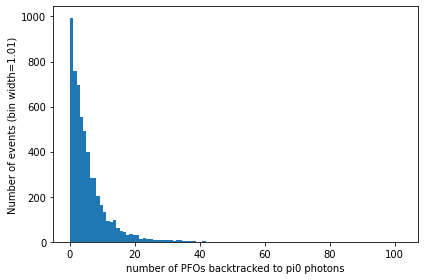

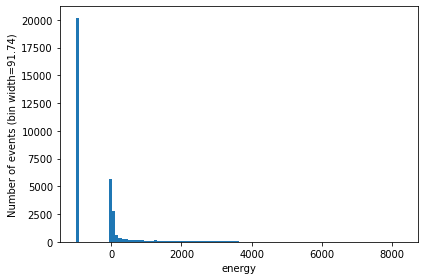

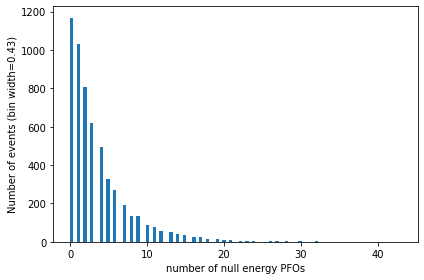

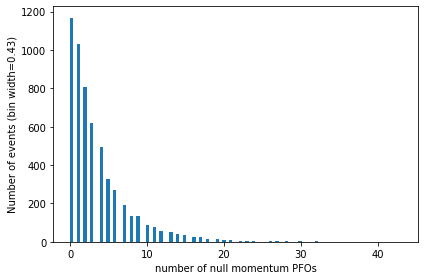

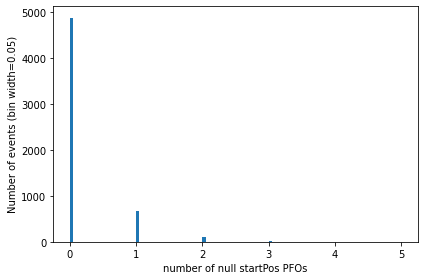

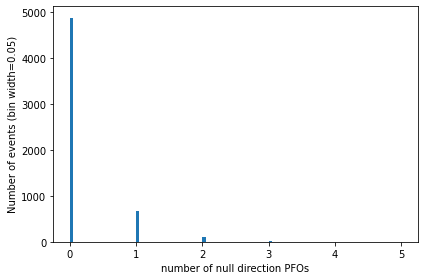

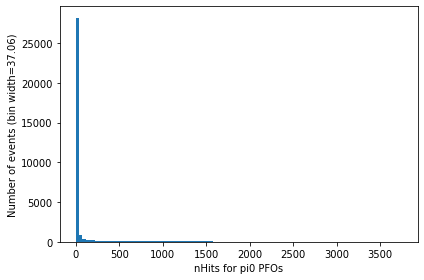

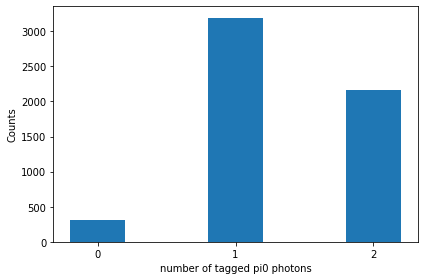

In [2]:
photons = events.trueParticles.number[events.trueParticles.pdg == 22]

pi0_PFOs = np.logical_or(events.trueParticlesBT.number == photons[:, 0], events.trueParticlesBT.number == photons[:, 1])

Plots.PlotHist(ak.ravel(ak.num(pi0_PFOs[pi0_PFOs])), xlabel="number of PFOs backtracked to pi0 photons")

photon_pdgs = events.trueParticlesBT.number[pi0_PFOs]
unique = ak.Array([np.unique(photon_pdgs[i]) for i in range(ak.count(events.eventNum))])
unique = ak.num(unique)

energy = events.recoParticles.energy[pi0_PFOs]
momentum = events.recoParticles.momentum[pi0_PFOs]
direction = events.recoParticles.direction[pi0_PFOs]
start = events.recoParticles.startPos[pi0_PFOs]

n_null_e = ak.ravel(ak.num(energy[energy == -999]))
n_null_p = ak.ravel(ak.num(momentum.x[momentum.x == -999]))
n_null_s = ak.ravel(ak.num(start.x[start.x == -999]))
n_null_d = ak.ravel(ak.num(direction.x[direction.x == -999]))
Plots.PlotHist(ak.ravel(energy), xlabel="energy")
Plots.PlotHist(n_null_e, xlabel="number of null energy PFOs")
Plots.PlotHist(n_null_p, xlabel="number of null momentum PFOs")
Plots.PlotHist(n_null_s, xlabel="number of null startPos PFOs")
Plots.PlotHist(n_null_d, xlabel="number of null direction PFOs")
Plots.PlotHist(ak.ravel(events.recoParticles.nHits[pi0_PFOs]), xlabel="nHits for pi0 PFOs")

Plots.PlotBar(unique, xlabel="number of tagged pi0 photons")